# Case 2. Pneumonia X-ray image analysis 
**Neural Networks for Machine Learning Applications**<br>
26.02.2023<br>
### Mateusz Czarnecki
### Julian Marco Soliveres
### Amal Kayed
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This Notebook was created in order to develop/train a CNN, which will process x-ray images from diseases (in this case from the ilness of pneumonia). Also, we will develop three different models to compare later on which one is better.

## 2. Setup

In order to acomplish that, we will use the next libraries: matplotlib, numpy, os and tensorflow. We use the first two libraries to create graphics to see the performance of our CNN. The os library is used to access directories of data and tensorflow to create the CNN. From tensorflow we import some specific libraries that we will need to create the model and to preprocess the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import time

## 3. Dataset

In [2]:
#Settings for the data generators
BATCH_SIZE = (32)
IMAGE_SIZE = (160,160)

For this dataset we used the code of Juha to rearrange the dataset downloaded from kagle, because in the original dataset the images for validation were too few. Because of that you can notice that in our dataset there is 16 images less than in the original dataset, but we didn't consider that this change will bring a huge change.

In [3]:
train_dir = 'C:/Users/julia/Downloads/Case2_XRay/train'
val_dir = 'C:/Users/julia/Downloads/Case2_XRay/validation'
test_dir = 'C:/Users/julia/Downloads/Case2_XRay/test'

In [33]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size = IMAGE_SIZE,
  batch_size = BATCH_SIZE)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  image_size = IMAGE_SIZE,
  batch_size = BATCH_SIZE)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size = IMAGE_SIZE,
  batch_size = BATCH_SIZE)

Found 3513 files belonging to 2 classes.
Found 1172 files belonging to 2 classes.
Found 1155 files belonging to 2 classes.
Found 1155 files belonging to 2 classes.


In [5]:
train_names_normal = os.listdir(os.path.join(train_dir,'NORMAL'))
train_names_pneumonia = os.listdir(os.path.join(train_dir,'PNEUMONIA'))

val_names_normal = os.listdir(os.path.join(val_dir,'NORMAL'))
val_names_pneumonia = os.listdir(os.path.join(val_dir,'PNEUMONIA'))

test_names_normal = os.listdir(os.path.join(test_dir,'NORMAL'))
test_names_pneumonia = os.listdir(os.path.join(test_dir,'PNEUMONIA'))

print('Train directory:')
print(len(train_names_normal),'normal images')
print(len(train_names_pneumonia),'pneumonia images') 

print('Validation directory:')
print(len(val_names_normal),'normal images')
print(len(val_names_pneumonia),'pneumonia images') 

print('Test directory:')
print(len(test_names_normal),'normal images')
print(len(test_names_pneumonia),'pneumonia images')

Train directory:
949 normal images
2564 pneumonia images
Validation directory:
317 normal images
855 pneumonia images
Test directory:
309 normal images
846 pneumonia images


## 4. Preprocessing

To preprocess our data we use two different methods: for the first and second model we use the preprocessing method available in mobilenet_v2; for the third model we use the method ImageDataGenerator to preprocess our data. We use a rotation_range of 0.05 because we noticed that with higher rotation_range we got more noise in our training data.

In [6]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 0.05, width_shift_range = 0.2,
    height_shift_range = 0.2, zoom_range = 0.2, 
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size= IMAGE_SIZE, batch_size= BATCH_SIZE,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
    target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,
    class_mode='binary')

Found 3513 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1155 images belonging to 2 classes.


## 5. Modeling

The first model we build is a **Transfer learning model** from **MobileNetV2** model. Later on we add three more layer: a **GlobalAveragePooling2D** layer, a **Dense** layer with 256 neurons and **Dense** output layer.

In [8]:
IMG_SHAPE = IMAGE_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [9]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
normal_layer = tf.keras.layers.Dense(256)
prediction_layer = tf.keras.layers.Dense(1)

In [10]:
inputs = tf.keras.Input(shape = IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training = False)
x = global_average_layer(x)
x = normal_layer(x)
outputs = prediction_layer(x)
modelTF = tf.keras.Model(inputs, outputs)

In [11]:
modelTF.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [12]:
base_learning_rate = 0.0001
modelTF.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics=['Accuracy','Recall','TrueNegatives', 'FalsePositives'])

The second model is similar to the first layer, but we add a **Dropout** layer afeter the dense layer (the one with 256 neurons) in order to help prevent overfitting.

In [13]:
global_average_layer1 = tf.keras.layers.GlobalAveragePooling2D()
normal_layer1 = tf.keras.layers.Dense(256)
prediction_layer1 = tf.keras.layers.Dense(1)

In [14]:
#Second Model
inputs2 = tf.keras.Input(shape = IMG_SHAPE)
x2 = preprocess_input(inputs2)
x2 = base_model(x2, training = False)
x2 = global_average_layer1(x2)
x2 = normal_layer1(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
outputs2 = prediction_layer1(x2)
model2 = tf.keras.Model(inputs, outputs)

In [15]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                    

In [16]:
base_learning_rate2 = 0.0001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate2),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics=['Accuracy','Recall','TrueNegatives', 'FalsePositives'])

The third model we build is a **Sequential model**. This model is created with five pair layers of **Conv2D + MaxPooling2D**,another **Conv2D** layer, a **Dense** layer with 256 neurons, a **Dropout** layer (in order to prevent overfitting in our model) and a **Dense** output layer. In the **Conv2D** layer the number of filters is increasing each layer when it's aproaching the output layer, with 16 filters as the inital number of filters and 128 as the last one. We use a size filter of 3x3.

In [17]:
model3 = models.Sequential()

model3.add(layers.Conv2D(16, (3, 3), activation='relu',
    input_shape=(160, 160, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [18]:
model3.compile(loss='binary_crossentropy', optimizer='rmsprop',
    metrics=['Accuracy','Recall','TrueNegatives', 'FalsePositives'])

## 6. Training

For the first two models we used **Adam** as a optimizer and for the third model we used **rmsprop** optimizer.

In [19]:
tTF = time.time()

historyTF = modelTF.fit(train_dataset,
                    epochs=7,
                    validation_data=val_dataset, verbose = 0)

print(f'Training time: {(time.time()-tTF)/60} minutes')

print('\nAccuracy:',historyTF.history['Accuracy'][-1])
print('Recall:',historyTF.history['recall'][-1])
print('Specificity', historyTF.history['true_negatives'][-1] / 
      (historyTF.history['false_positives'][-1] + historyTF.history['true_negatives'][-1]))

print('\nVal Accuracy:',historyTF.history['val_Accuracy'][-1])
print('Val Recall:',historyTF.history['val_recall'][-1])
print('Val Specificity', historyTF.history['val_true_negatives'][-1] / 
      (historyTF.history['val_false_positives'][-1] + historyTF.history['val_true_negatives'][-1]))

Training time: 5.877280743916829 minutes

Accuracy: 0.9607173204421997
Recall: 0.9629485011100769
Specificity 0.9546891464699684

Val Accuracy: 0.9581910967826843
Val Recall: 0.9684210419654846
Val Specificity 0.9305993690851735


In [20]:
t2 = time.time()

history2 = model2.fit(train_dataset, epochs=7,
    validation_data=val_dataset, verbose = 0)

print(f'Training time: {(time.time()-t2)/60} minutes')

print('\nAccuracy:',history2.history['Accuracy'][-1])
print('Recall:',history2.history['recall'][-1])
print('Specificity', history2.history['true_negatives'][-1] / 
      (history2.history['false_positives'][-1] + history2.history['true_negatives'][-1]))

print('\nVal Accuracy:',history2.history['val_Accuracy'][-1])
print('Val Recall:',history2.history['val_recall'][-1])
print('Val Specificity', history2.history['val_true_negatives'][-1] / 
      (history2.history['val_false_positives'][-1] + history2.history['val_true_negatives'][-1]))

Training time: 5.838787142435709 minutes

Accuracy: 0.9755194783210754
Recall: 0.9769890904426575
Specificity 0.9715489989462592

Val Accuracy: 0.9598976373672485
Val Recall: 0.9578947424888611
Val Specificity 0.9652996845425867


In [21]:
t3 = time.time()

history3 = model3.fit(train_generator, steps_per_epoch=109, epochs=24,
    validation_data=validation_generator, verbose = 0)

print(f'Training time: {(time.time()-t3)/60} minutes')

print('\nAccuracy:',history3.history['Accuracy'][-1])
print('Recall:',history3.history['recall'][-1])
print('Specificity', history3.history['true_negatives'][-1] / 
      (history3.history['false_positives'][-1] + history3.history['true_negatives'][-1]))

print('\nVal Accuracy:',history3.history['val_Accuracy'][-1])
print('Val Recall:',history3.history['val_recall'][-1])
print('Val Specificity', history3.history['val_true_negatives'][-1] / 
      (history3.history['val_false_positives'][-1] + history3.history['val_true_negatives'][-1]))

Training time: 28.853214832146964 minutes

Accuracy: 0.9451307058334351
Recall: 0.9649330377578735
Specificity 0.8918345705196182

Val Accuracy: 0.9556313753128052
Val Recall: 0.9777777791023254
Val Specificity 0.8958990536277602


## 7. Performance and evaluation

With the next code we will see loss metric through the epochs to see how well our models have done it and also to see if there is overfitting.

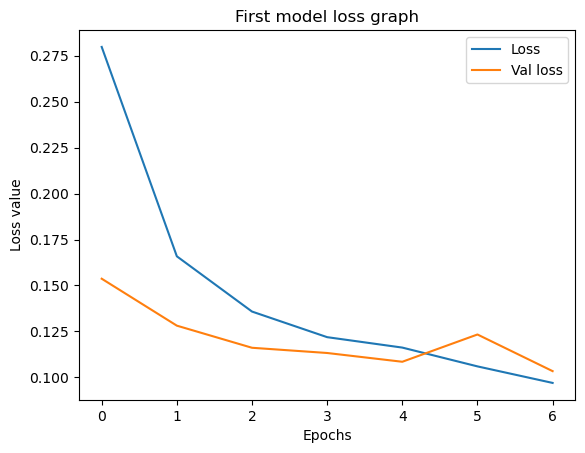

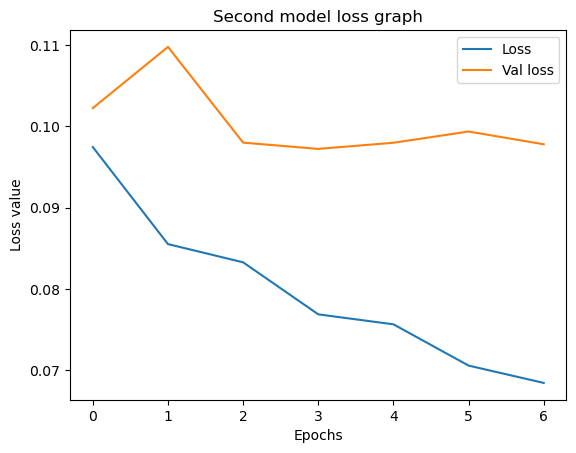

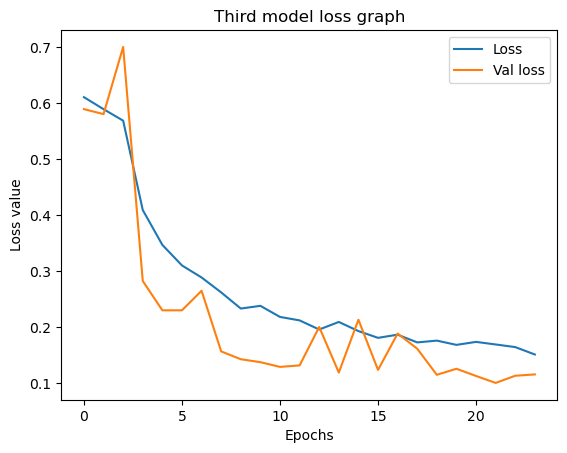

In [24]:
plt.plot(historyTF.history['loss'], label='Loss')
plt.plot(historyTF.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.title("First model loss graph")
plt.show()

plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.title("Second model loss graph")
plt.show()

plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.title("Third model loss graph")
plt.show()

Now we will plot the accuracy metric of the three models.

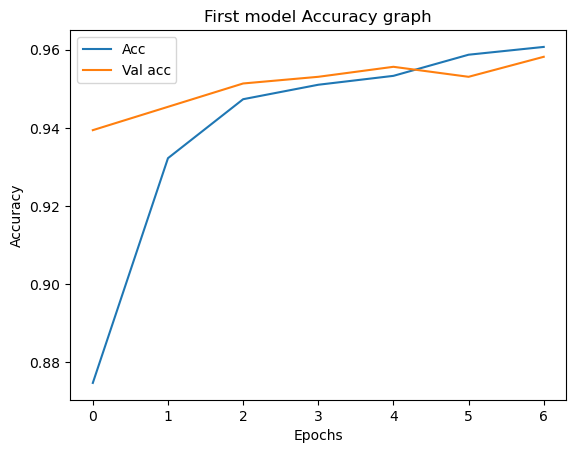

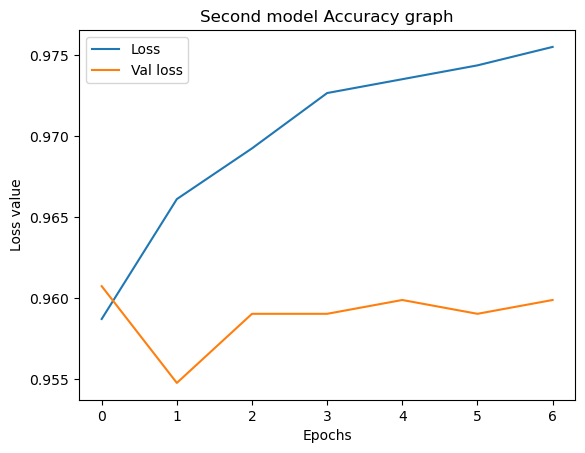

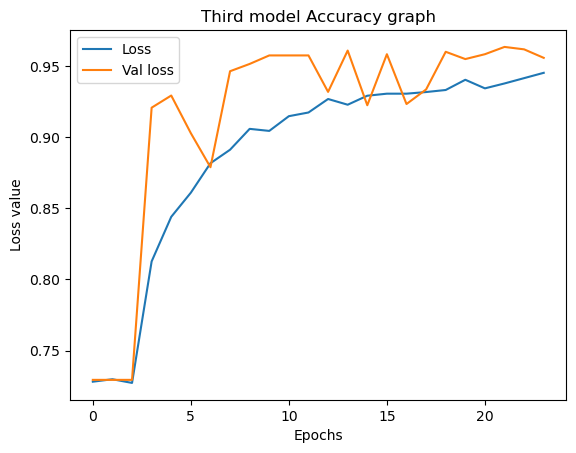

In [25]:
plt.plot(historyTF.history['Accuracy'], label='Acc')
plt.plot(historyTF.history['val_Accuracy'], label='Val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("First model Accuracy graph")
plt.show()

plt.plot(history2.history['Accuracy'], label='Loss')
plt.plot(history2.history['val_Accuracy'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.title("Second model Accuracy graph")
plt.show()

plt.plot(history3.history['Accuracy'], label='Loss')
plt.plot(history3.history['val_Accuracy'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.title("Third model Accuracy graph")
plt.show()

The next few graphs present the sensitivity and specificity of our models for both training and validation sets, changing over the number of epochs. The specificity is calculated based on the following pattern: 
- **TN / (FP + TN)**

where: 
- **TN** equals the number of True Negatives
- **TP** represents the number of False Positives

Text(0.5, 1.0, 'First model')

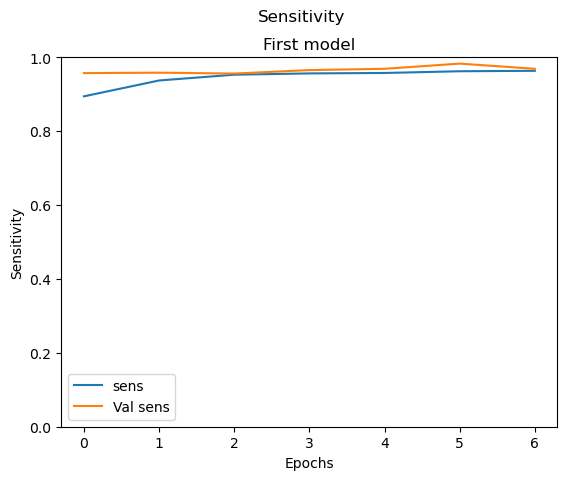

In [30]:
sensitivity1 = historyTF.history['recall']
val_sensitivity1 = historyTF.history['val_recall']

false_positives1 = historyTF.history['false_positives']
val_false_positives1 = historyTF.history['val_false_positives']

true_negatives1 = historyTF.history['true_negatives']
val_true_negatives1 = historyTF.history['val_true_negatives']

specificity1 = []
val_specificity1 = []

for i in range(0, len(false_positives1)):
    specificity1.append(true_negatives1[i] / (false_positives1[i] + true_negatives1[i]))
    
for i in range(0, len(val_false_positives1)):
    val_specificity1.append(val_true_negatives1[i] / (val_false_positives1[i] + val_true_negatives1[i]))


plt.plot(sensitivity1, label='sens')
plt.plot(val_sensitivity1, label='Val sens')
plt.legend()
plt.suptitle('Sensitivity')
plt.xlabel('Epochs')
plt.ylabel('Sensitivity')
plt.ylim([0, 1])
plt.title("First model")

Text(0.5, 1.0, 'Second model Sensitivity graph')

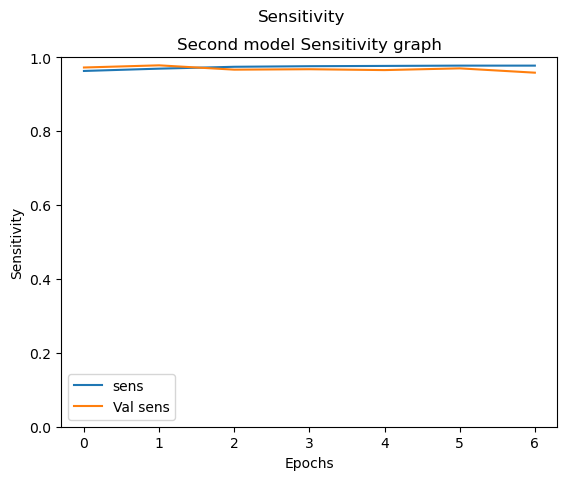

In [27]:
sensitivity2 = history2.history['recall']
val_sensitivity2 = history2.history['val_recall']

false_positives2 = history2.history['false_positives']
val_false_positives2 = history2.history['val_false_positives']

true_negatives2 = history2.history['true_negatives']
val_true_negatives2 = history2.history['val_true_negatives']

specificity2 = []
val_specificity2 = []

for i in range(0, len(false_positives2)):
    specificity2.append(true_negatives2[i] / (false_positives2[i] + true_negatives2[i]))
    
for i in range(0, len(val_false_positives2)):
    val_specificity2.append(val_true_negatives2[i] / (val_false_positives2[i] + val_true_negatives2[i]))


plt.plot(sensitivity2, label='sens')
plt.plot(val_sensitivity2, label='Val sens')
plt.legend()
plt.suptitle('Sensitivity')
plt.xlabel('Epochs')
plt.ylabel('Sensitivity')
plt.ylim([0, 1])
plt.title("Second model")

Text(0.5, 1.0, 'Third model Sensitivity graph')

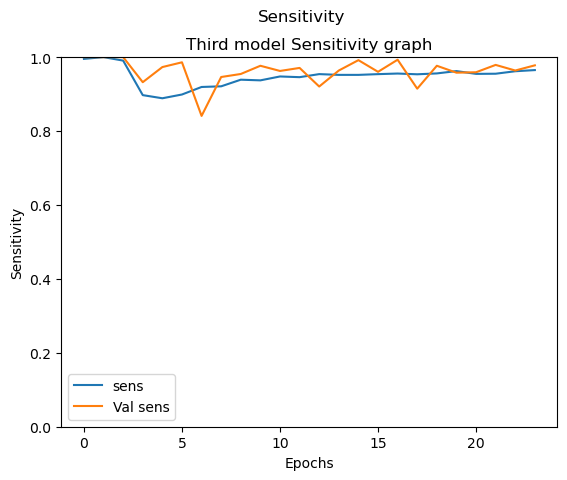

In [22]:
sensitivity3 = history3.history['recall']
val_sensitivity3 = history3.history['val_recall']

false_positives3 = history3.history['false_positives']
val_false_positives3 = history3.history['val_false_positives']

true_negatives3 = history3.history['true_negatives']
val_true_negatives3 = history3.history['val_true_negatives']

specificity3 = []
val_specificity3 = []

for i in range(0, len(false_positives3)):
    specificity3.append(true_negatives3[i] / (false_positives3[i] + true_negatives3[i]))
    
for i in range(0, len(val_false_positives3)):
    val_specificity3.append(val_true_negatives3[i] / (val_false_positives3[i] + val_true_negatives3[i]))


plt.plot(sensitivity3, label='sens')
plt.plot(val_sensitivity3, label='Val sens')
plt.legend()
plt.suptitle('Sensitivity')
plt.xlabel('Epochs')
plt.ylabel('Sensitivity')
plt.ylim([0, 1])
plt.title("Third model")

Text(0.5, 1.0, 'First model Specificity graph')

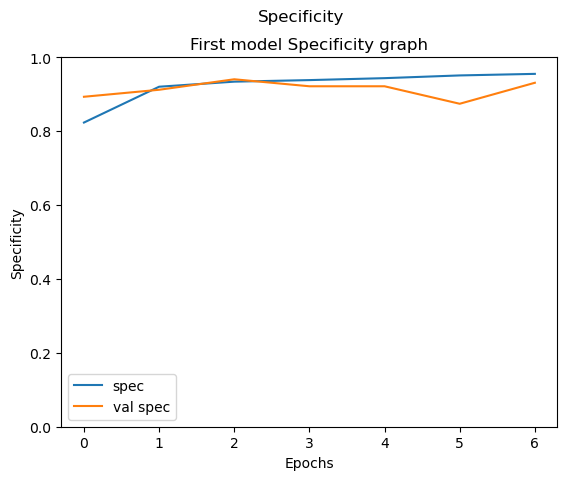

In [28]:
plt.plot(specificity1, label='spec')
plt.plot(val_specificity1, label='val spec')
plt.legend()
plt.suptitle('Specificity')
plt.xlabel('Epochs')
plt.ylabel('Specificity')
plt.ylim([0, 1])
plt.title("First model")

Text(0.5, 1.0, 'Second model Specificity graph')

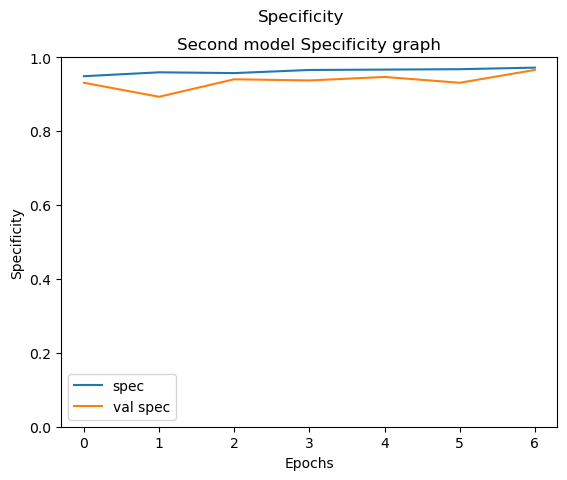

In [29]:
plt.plot(specificity2, label='spec')
plt.plot(val_specificity2, label='val spec')
plt.legend()
plt.suptitle('Specificity')
plt.xlabel('Epochs')
plt.ylabel('Specificity')
plt.ylim([0, 1])
plt.title("Second model")

Text(0.5, 1.0, 'Third model Specificity graph')

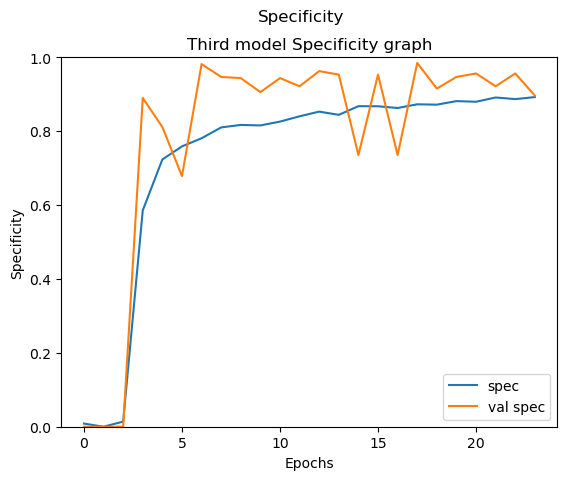

In [23]:
plt.plot(specificity3, label='spec')
plt.plot(val_specificity3, label='val spec')
plt.legend()
plt.suptitle('Specificity')
plt.xlabel('Epochs')
plt.ylabel('Specificity')
plt.ylim([0, 1])
plt.title("Third model")

To sum up, here are all the final performance indicators of our convolusional neural network models for the **test set**.

We are going to evaluate our models and print out all the performance indicators taken into consideration when creating the models.

In [31]:
test_evaluation1 = modelTF.evaluate(test_dataset)

print()
print('----------------------------------')
print('Summary performance indicators:')
print('----------------------------------')
print('\nLoss function: ', test_evaluation1[0])
print('Accuracy: ', test_evaluation1[1])
print('Sensitivity: ', test_evaluation1[2])
true_negatives = test_evaluation1[3]
false_positives = test_evaluation1[4]
print('Specificity: ', true_negatives / (true_negatives + false_positives))

37/37 [==============================] - 17s 412ms/step - loss: 0.1026 - Accuracy: 0.9567 - recall: 0.9586 - true_negatives: 294.0000 - false_positives: 15.0000

----------------------------------
Summary performance indicators:
----------------------------------

Loss function:  0.1025942862033844
Accuracy:  0.9567099809646606
Sensitivity:  0.9586288332939148
Specificity:  0.9514563106796117


In [34]:
test_evaluation2 = model2.evaluate(test_dataset)

print()
print('----------------------------------')
print('Summary performance indicators:')
print('----------------------------------')
print('\nLoss function: ', test_evaluation2[0])
print('Accuracy: ', test_evaluation2[1])
print('Sensitivity: ', test_evaluation2[2])
true_negatives = test_evaluation2[3]
false_positives = test_evaluation2[4]
print('Specificity: ', true_negatives / (true_negatives + false_positives))

37/37 [==============================] - 10s 267ms/step - loss: 0.1026 - Accuracy: 0.9567 - recall: 0.9586 - true_negatives: 294.0000 - false_positives: 15.0000

----------------------------------
Summary performance indicators:
----------------------------------

Loss function:  0.1025942787528038
Accuracy:  0.9567099809646606
Sensitivity:  0.9586288332939148
Specificity:  0.9514563106796117


In [35]:
test_evaluation3 = model3.evaluate(test_generator)

print()
print('----------------------------------')
print('Summary performance indicators:')
print('----------------------------------')
print('\nLoss function: ', test_evaluation3[0])
print('Accuracy: ', test_evaluation3[1])
print('Sensitivity: ', test_evaluation3[2])
true_negatives = test_evaluation3[3]
false_positives = test_evaluation3[4]
print('Specificity: ', true_negatives / (true_negatives + false_positives))

37/37 [==============================] - 10s 267ms/step - loss: 0.1276 - Accuracy: 0.9532 - recall: 0.9811 - true_negatives: 271.0000 - false_positives: 38.0000

----------------------------------
Summary performance indicators:
----------------------------------

Loss function:  0.12759673595428467
Accuracy:  0.9532467722892761
Sensitivity:  0.9810874462127686
Specificity:  0.8770226537216829


## 8. Discussion and conclusions

During the work process, we tested various models assigning each model different layers and numbers of filters. However, we noticed that for our **sequential** model increasing the number of layers didn't mean an increase of the performance. We also noticed that for **jupyter notebook kernel** doesn't work to put two models with similar structure, that's why we created two **transfer learning** models because when we wanted to put two **sequential** models, it gave us an error.

In conclusion, the best models in which we get better results is the first and second model. This tell us that transfer learning sometimes give us a better performance than the Sequentials models, because not only the time spent in training was way lower but also the results were way better. Also, is true that the sensivity in the third model was better, but in our opinon the first two models give us an overall better results. That's why we decide to use transfer learning as our main model.